<a href="https://colab.research.google.com/github/Anik-Adnan/Natural-Language-Processing/blob/main/Advanced_Lexical_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 📖 Session Introduction

### Introduction
In the previous session, you learnt all the **basic lexical processing techniques** such as:
- Removing stop words  
- Tokenization  
- Stemming and lemmatization  
- Creating Bag-of-Words and TF-IDF models  
- Building a spam detector  

These preprocessing steps are applicable in **almost every text analytics application**.

Even after applying these preprocessing steps, **a lot of noise is still present** in the data. Examples include:
- Spelling mistakes (by accident or intentionally, e.g., 'lol', 'awsum')  
- Spelling variations due to pronunciation differences (e.g., Bangalore vs Bengaluru)  

In this session, you’ll learn how to:
- **Identify and process incorrectly spelt words**  
- **Handle spelling variations**  
- Tokenize text **efficiently**, especially for multi-word terms like:
  - ‘Hong Kong’  
  - ‘Calvin Klein’  
  - ‘International Institute of Information Technology’  

Simple tokenization splits these into separate words, but such terms should be preserved as **single tokens**. This session will cover techniques to build **intelligent tokenizers**.

---

### 🔹 What you’ll learn in this session
1. **Phonetic hashing and the Soundex algorithm** to handle different pronunciations of a word.  
2. **Minimum-edit-distance algorithm** and building a spell corrector.  
3. **Pointwise Mutual Information (PMI)** score to preserve multi-word terms as single tokens.  

---

### 📌 Prerequisites
- Knowledge of the **previous session** and the **previous module**.  
- No additional prerequisites are required for this session.  


## 🛠️ Canonicalisation

### Introduction
In the last session, you learnt techniques to **reduce a word to its base form**, specifically:  
- **Stemming**  
- **Lemmatization**  

These techniques are part of a broader concept called **canonicalisation**.  

**Canonicalisation**: The process of reducing a word to its base form.  
- **Stemming:** Reduces a word to its root form.  
- **Lemmatization:** Reduces a word to its lemma.  
- Both root and lemma are **base forms of inflected words**.

---

### 🔹 Limitations of Stemming and Lemmatization
Some cases cannot be handled effectively by stemming or lemmatization alone. For example, **misspelled words**:

Corpus contains two misspelt versions of *disappearing*:  


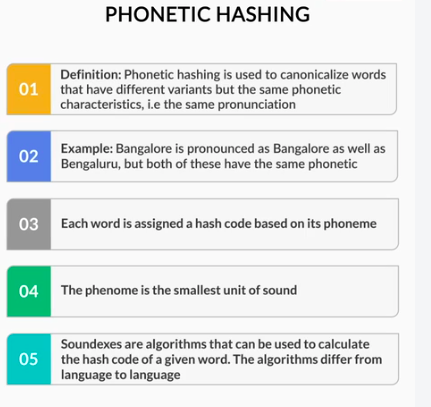

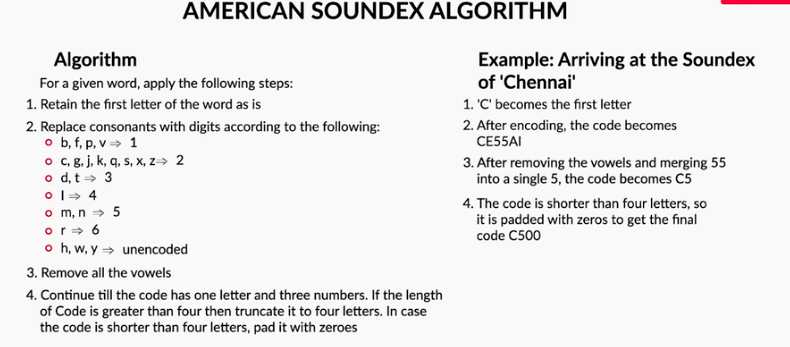

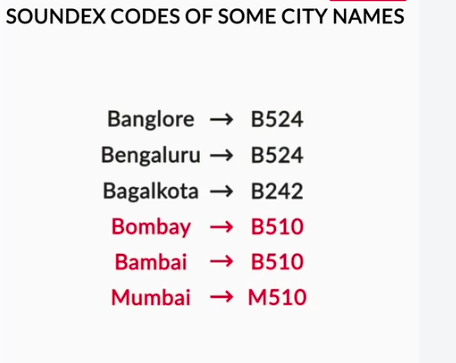

## 🔊 Phonetic Hashing

### Introduction
Certain words have **different pronunciations** in different languages, which often leads to **different spellings** in a text corpus. Examples include:  
- City names: `Delhi` vs `Dilli`  
- Personal names: `Agrawal` with multiple spellings  
- Dish names and other proper nouns  

Applying **stemming or lemmatization** alone does not solve the problem of **redundant tokens**, because multiple variants of the same word still exist. To address this, we use **phonetic hashing**.

---

### 🔹 What is Phonetic Hashing?
Phonetic hashing groups **words with similar sounds (phonemes)** into a single bucket and assigns them a **common hash code**.  

Example:  
- `Dilli` and `Delhi` → same hash code  

This ensures that all variations of a word **map to the same canonical form**, reducing redundancy.

---

### 🔹 Soundex Algorithm
The most popular phonetic hashing method is the **American Soundex algorithm**.  
- Maps words that sound similar to a **common code**  
- Works across dialects and languages  
- Handles **British vs American spellings**  

---

### 🔹 Example: Soundex of "Mississippi"

1. **First letter retained:**  
   - Input: `Mississippi`  
   - Code starts with: `M`  

2. **Map consonants (except first letter):**  
   - Vowels remain as is (`A, E, I, O, U`)  
   - Letters `H, W, Y` are **ignored/unencoded**  
   - Consonants mapped to numbers → `MI22I22I11I`  

3. **Remove vowels:**  
   - Remove all `I`s → `M222211`  

4. **Merge consecutive duplicates:**  
   - `222` → `2`  
   - `11` → `1`  
   - Code becomes → `M21`  

5. **Force four-character code:**  
   - If less than four characters, **pad with zeros**  
   - If more than four characters, **truncate from the right**  
   - `M21` → pad → `M210`  

**Final Soundex code:**  


### ❓ True/False Question

**Statement:**  
The first letter of the Soundex of **Mumbai** and **Bombay** is the same.  

**Answer:**  
**False**  

**Explanation:**  
- Soundex retains the **first letter of the word** as the first character of the code.  
- `Mumbai` → Soundex starts with **M**  
- `Bombay` → Soundex starts with **B**  
- Since **M ≠ B**, the first letters are **not the same**.


### ❓ Question: Phonetic Hashing

**The reason behind not mapping the vowels and ‘H’, ‘Y’, and ‘W’ to integer numbers is:**  

**Answer:**  
**The vowels and the letters ‘H’, ‘Y’ and ‘W’ are the letters whose sounds change in a word in different accents and pronunciations.**  

**Explanation:**  
- Soundex aims to group words by **similar pronunciation**, not exact spelling.  
- Vowels and letters like `H, Y, W` often **do not affect the phonetic identity** significantly.  
- Ignoring them reduces **redundant variations** while preserving the main consonant sounds.


### ❓ True/False Question

**Statement:**  
The Soundex of **Bengaluru** and **Mysuru** is the same.  

**Answer:**  
**False**  

**Explanation:**  
- Soundex retains the **first letter of the word** and encodes the remaining consonants.  
- `Bengaluru` → starts with **B**  
- `Mysuru` → starts with **M**  
- Since the first letters differ, the **Soundex codes are different**.


# Edit Distance

## Summary

Edit distance is a fundamental concept in text processing and natural language processing (NLP). It measures the **minimum number of operations required to transform one string into another**. It is particularly useful for:

- Correcting **misspellings**.
- Handling minor differences in words due to typos.
- Canonicalizing words before stemming or lemmatization.
- Applications in **spell checkers**, **OCR correction**, **DNA sequence alignment**, and more.

### Key Points:

1. **Edit Distance Definition**:  
   The edit distance between two strings is a **non-negative integer** representing the minimum number of edits needed to convert the source string into the target string.

2. **Edit Operations**:  
   There are three types of basic edit operations:
   - **Insertion**: Adding a character to the string.  
     Example: `'color' → 'colour'` (insert `'u'`)
   - **Deletion**: Removing a character from the string.  
     Example: `'Matt' → 'Mat'` (delete one `'t'`)
   - **Substitution**: Replacing a character with another.  
     Example: `'Iran' → 'Iraq'` (replace `'n'` with `'q'`)

3. **Example Calculation**:  
   Transform `'applaud'` → `'apple'`:
   - Substitute `'a'` → `'e'`
   - Delete `'u'`
   - Delete `'d'`  
   **Total edits = 3**

4. **Complex Strings**:  
   For longer or more complex words, it is difficult to calculate manually.  
   Example: `'deleterious'` → `'deletion'` requires multiple substitutions, insertions, and deletions.

5. **Applications in Spell Correction**:  
   - Automatically correct misspelled words in text data.
   - Canonicalize words before text preprocessing.
   - Improve accuracy of NLP tasks such as tokenization, stemming, and lemmatization.

---

## In-Depth Details

- Edit distance is often referred to as **Levenshtein Distance**, named after Vladimir Levenshtein who introduced it in 1965.
- Let `source = s` and `target = t`. If `len(s) = m` and `len(t) = n`, we compute a **matrix of size (m+1) x (n+1)** to find the minimum edits.
- **Dynamic Programming Approach**:
  - Define `dp[i][j]` as the edit distance between the first `i` characters of `s` and first `j` characters of `t`.
  - Recurrence relation:
    ```
    if s[i-1] == t[j-1]:
        dp[i][j] = dp[i-1][j-1]  # no edit needed
    else:
        dp[i][j] = 1 + min(
            dp[i-1][j],    # deletion
            dp[i][j-1],    # insertion
            dp[i-1][j-1]   # substitution
        )
    ```
  - Base cases:
    ```
    dp[0][j] = j  # converting empty source to target requires j insertions
    dp[i][0] = i  # converting source to empty target requires i deletions
    ```

- **Time Complexity**: `O(m*n)`  
- **Space Complexity**: `O(m*n)` (can be optimized to `O(min(m,n))` with rolling array)

---


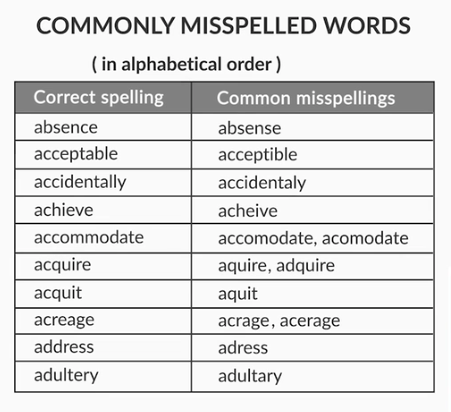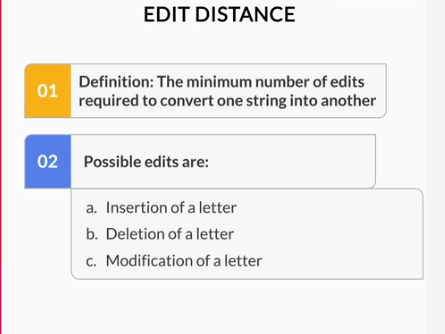

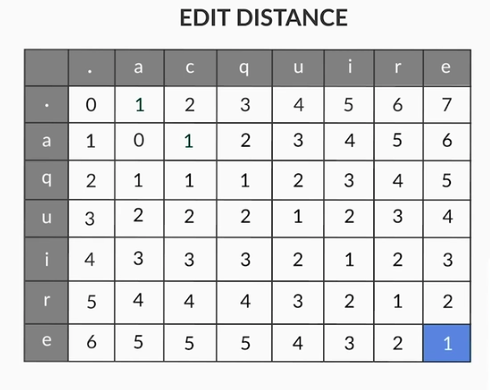

In [2]:
## Example Python Implementation

def edit_distance(source, target):
    m, n = len(source), len(target)
    dp = [[0]*(n+1) for _ in range(m+1)]

    # Initialize base cases
    for i in range(m+1):
        dp[i][0] = i
    for j in range(n+1):
        dp[0][j] = j

    # Fill DP table
    for i in range(1, m+1):
        for j in range(1, n+1):
            if source[i-1] == target[j-1]:
                dp[i][j] = dp[i-1][j-1]
            else:
                dp[i][j] = 1 + min(
                    dp[i-1][j],    # deletion
                    dp[i][j-1],    # insertion
                    dp[i-1][j-1]   # substitution
                )
    return dp[m][n]

# Example Usage
source_word = "applaud"
target_word = "apple"
distance = edit_distance(source_word, target_word)
print(f"Edit Distance between '{source_word}' and '{target_word}' is {distance}")


Edit Distance between 'applaud' and 'apple' is 3


# Edit Distance - Specific Cell Value

**Strings:**  
- Source (correct): `courageous`  
- Target (misspelt): `courageus`  

We are asked for the **cell value at row `'g'` and column `'g'`**.  

- Up to this point, the first `'g'` in both strings matches.  
- Therefore, **no edit is needed at this point**.  

**Answer:**  0


# Edit Distance - Damerau–Levenshtein Distance

**Question:**  
Find the **Damerau–Levenshtein edit distance** between the strings `"Damerau"` and `"Levenshtein"`. You may use NLTK to compute the distance.

---

## Answer:

The **Damerau–Levenshtein distance** is an extension of the standard edit distance that counts **transpositions of adjacent characters as a single edit**.


In [3]:
import nltk
from nltk.metrics.distance import edit_distance

# Strings
source = "Damerau"
target = "Levenshtein"

# Compute Damerau–Levenshtein distance
distance = edit_distance(source, target, transpositions=True)
print(f"Damerau–Levenshtein distance between '{source}' and '{target}' is {distance}")


Damerau–Levenshtein distance between 'Damerau' and 'Levenshtein' is 10


# Edit Distance - Specific Cell Value

**Question:**  
Suppose you are calculating the edit distance between the strings `'courageous'` (the correct spelling) and `'courageus'` (misspelt word). What is the value in the cell present in the row with letter `'a'` and the column with letter `'e'`?

---

## Answer:

- Source substring up to `'a'`: `"c o u r a"`  
- Target substring up to `'e'`: `"c o u r a g e"`  
- To convert `"c o u r a"` → `"c o u r a g e"`, we need to **insert `'g'` and `'e'`**.  

```python
# Value of the edit distance cell at row 'a' and column 'e'
cell_value = 2
print(cell_value)


# Edit Distance – Full Code Solution

## Question
Suppose you are calculating the edit distance between the strings  
**`"courageous"`** (correct spelling) and **`"courageus"`** (misspelt word).  

What is the value in the edit distance matrix at the **row with letter `'a'`**
and the **column with letter `'e'`**?

---

## Full Python Code (Colab / NLTK)


In [4]:
from nltk.metrics.distance import edit_distance

# Source and target strings
source = "courageous"
target = "courageus"

# Lengths
m, n = len(source), len(target)

# Initialize DP matrix
dp = [[0] * (n + 1) for _ in range(m + 1)]

# Base cases
for i in range(m + 1):
    dp[i][0] = i
for j in range(n + 1):
    dp[0][j] = j

# Fill DP table
for i in range(1, m + 1):
    for j in range(1, n + 1):
        if source[i - 1] == target[j - 1]:
            dp[i][j] = dp[i - 1][j - 1]
        else:
            dp[i][j] = 1 + min(
                dp[i - 1][j],     # deletion
                dp[i][j - 1],     # insertion
                dp[i - 1][j - 1]  # substitution
            )

# Find indices of 'a' in source and 'e' in target
row_index = source.index('a') + 1
col_index = target.index('e') + 1

# Print the specific cell value
print("Value at row 'a' and column 'e':", dp[row_index][col_index])

Value at row 'a' and column 'e': 2


# Edit Distance

## Question
What is the edit distance between **"Mountain"** and **"Mountbatten"**?

---

## Answer

To convert **"Mountain"** → **"Mountbatten"**, the minimum edit operations are:

1. Insert `'b'` after `'t'`
2. Substitute `'i'` → `'t'`
3. Insert `'t'`
4. Insert `'e'`

```python
edit_distance = 4
print(edit_distance)


# Edit Distance

## Question
"The number of edits to transform a source string to a target string is the same as the number of edits to transform the target string to the source string."

Is the above statement **True or False**?

---
# The statement is correct. It doesn't matter which is the source string and which is the target string while calculating the edit distance.

## Answer

```python
True


# Spell Corrector – I (Norvig’s Spell Corrector)


A **spell corrector** automatically fixes misspelled words by replacing them with the most likely correct spelling. It is a crucial **lexical preprocessing step** in NLP systems such as search engines, chatbots, and autocorrect tools.

In this section, we study **Norvig’s Spell Corrector**, a simple yet powerful algorithm that uses:
- **Edit distance**
- **Word frequency (probability)**
- A **large seed document** instead of a simple dictionary

---

## Question

**Why is spell correction important in NLP applications, and how does Norvig’s spell corrector work?**

---

## Answer

Spell correction is important because misspelled words negatively affect downstream tasks like stemming, lemmatization, and intent detection.  
Norvig’s spell corrector works by:
1. Generating candidate words using edit distance.
2. Filtering valid English words using a frequency dictionary.
3. Selecting the most probable correction based on word frequency.

---

### 1. Why Spell Correction Is Needed

- User-generated text (social media, chatbots, search queries) often contains **typos**.
- Example:


→ `"Bangalor"` should be corrected to `"Bangalore"`.

Without correction:
- Tokenization may fail
- Stemming/Lemmatization becomes inaccurate
- NLP models may misunderstand user intent

---

### 2. Seed Document (`big.txt`)

- Norvig’s spell corrector uses a **large book** (`The Adventures of Sherlock Holmes`) as a seed.
- Why a book and not a dictionary?
- A dictionary only tells **which words are correct**
- A book tells:
  - Which words are correct
  - **How frequently each word occurs**

This allows probability-based correction.

---

### 3. Core Functions in Norvig’s Spell Corrector

#### (a) `words()`
- Tokenizes text into words
- Can be implemented using:
- NLTK tokenizers
- Regular expressions

#### (b) `Counter`
- Builds a **frequency distribution**
- Stores words as:
```python
{word: count}


# Spell Corrector – II (Final Assembly)

In this section, we **complete Norvig’s spell corrector** by combining all previously built components into a single function.  
So far, we have implemented:

- `edits_one()` → words one edit away  
- `edits_two()` → words two edits away  
- `known()` → filters valid English words  
- `possible_corrections()` → generates candidate corrections  
- `prob()` → assigns probability based on word frequency  

Now, we **wrap everything together** into a final function (commonly called `rectify`) that:
1. Generates candidate spellings
2. Computes their probabilities
3. Returns the **most likely correct word**

---

## Question

**How is the final spell corrector function built, and how do you use it to correct misspelled words?**

---

## Answer

The final spell corrector selects the most probable word from the list returned by `possible_corrections()` using the `prob()` function. This logic is wrapped inside a function called `rectify()`.

---

### Final Logic of Spell Correction

Given a misspelled word:

1. Generate possible corrections using edit distance
2. Filter valid dictionary words
3. Compute probability of each candidate
4. Return the word with the **highest probability**

Mathematically:

```python
argmax_c P(c)  for c ∈ possible_corrections(word)


In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [7]:
import re
from collections import Counter

# Step 1: Tokenization
def words(text):
    return re.findall(r"[a-z]+", text.lower())

# Step 2: Load seed document
with open("/content/drive/MyDrive/Colab-Notebooks/seed-document.txt", encoding="utf-8") as f:
    WORDS = Counter(words(f.read()))

TOTAL_WORDS = sum(WORDS.values())

# Step 3: Probability function
def prob(word):
    return WORDS[word] / TOTAL_WORDS

# Step 4: Known words
def known(words_list):
    return set(w for w in words_list if w in WORDS)

# Step 5: One-edit distance
def edits_one(word):
    letters = 'abcdefghijklmnopqrstuvwxyz'
    splits = [(word[:i], word[i:]) for i in range(len(word) + 1)]

    deletes = [L + R[1:] for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R) > 1]
    replaces = [L + c + R[1:] for L, R in splits if R for c in letters]
    inserts = [L + c + R for L, R in splits for c in letters]

    return set(deletes + transposes + replaces + inserts)

# Step 6: Two-edit distance
def edits_two(word):
    return set(e2 for e1 in edits_one(word) for e2 in edits_one(e1))

# Step 7: Possible corrections
def possible_corrections(word):
    return (known([word]) or
            known(edits_one(word)) or
            known(edits_two(word)) or
            {word})

# Step 8: Final spell corrector
def rectify(word):
    return max(possible_corrections(word), key=prob)


In [8]:
correct = rectify("laern")
print(correct)


learn


# Pointwise Mutual Information (PMI) – I

---

## Summary

In text processing, **tokenization** often breaks meaningful multi-word expressions (MWEs) such as organization names, locations, or technical terms into separate words. This causes loss of semantic meaning.  
**Pointwise Mutual Information (PMI)** is a statistical measure that helps identify **strongly associated words**, allowing us to group them into a single token (e.g., `Indian_Institute_of_Technology`).

PMI measures **how much more often words occur together than expected by chance**.

---

## Problem Motivation

Consider the phrase:

> *International Institute of Information Technology, Bangalore*

After tokenization, it becomes:



But this destroys the identity of the institution.  
PMI helps us detect that these words **co-occur frequently** and should be treated as a **single unit**.

---

## What is PMI?

### Definition (Two Words)

For two words `x` and `y`:

```math
PMI(x, y) = log \left( \frac{P(x, y)}{P(x)P(y)} \right)


## Question

**What’s the probability of the word _‘nobel’_?**

Given corpus:

1. *The Nobel Prize is a set of five annual international awards bestowed in several categories by Swedish and Norwegian institutions in recognition of academic, cultural, or scientific advances.*  
2. *In the 19th century, the Nobel family who were known for their innovations to the oil industry in Azerbaijan was the leading representative of foreign capital in Baku.*  
3. *The Nobel Prize was funded by personal fortune of Alfred Nobel.*  
4. *The Board of the Nobel Foundation decided that after this addition, it would allow no further new prize.*

Occurrence context: **Sentence**

---

## Answer

- Total number of sentences = **4**
- Number of sentences containing the word **“nobel”** = **4**

\[
P(\text{nobel}) = \frac{4}{4} = 1.00
\]

### ✅ **Final Answer:** **1.00**


## Question

**What’s the probability of the word _‘prize’_?**

## Answer

- Total number of sentences = **4**
- Number of sentences containing the word **“prize”** = **3**  
  (Sentences 1, 3, and 4)

\[
P(\text{prize}) = \frac{3}{4} = 0.75
\]

### ✅ **Final Answer:** **0.75**


## Question

**What’s the probability of the term _‘Nobel Prize’_?**

## Answer

- Total number of sentences = **4**
- Number of sentences containing the term **“Nobel Prize”** = **2**  
  (Sentences 1 and 3)

\[
P(\text{Nobel Prize}) = \frac{2}{4} = 0.50
\]

### ✅ **Final Answer:** **0.50**


## Corrected Answer

### Question  
**What’s the PMI of the term _‘Nobel Prize’_?**  
(Logarithm base = **10**, occurrence context = **sentence**)

---

## Step 1: Sentence Counts

Total number of sentences = **4**

### P(Nobel)
The word **“Nobel”** appears in **all 4 sentences**  
(Sentences 1, 2, 3, and “Nobel Foundation” in sentence 4)

\[
P(\text{Nobel}) = \frac{4}{4} = 1.00
\]

---

### P(Prize)
The word **“Prize”** appears in **3 sentences**  
(Sentences 1, 3, and 4)

\[
P(\text{Prize}) = \frac{3}{4} = 0.75
\]

---

### P(Nobel Prize)
The term **“Nobel Prize”** appears together in **2 sentences**  
(Sentences 1 and 3)

\[
P(\text{Nobel Prize}) = \frac{2}{4} = 0.50
\]

---

## Step 2: PMI Formula

\[
PMI(x, y) = \log_{10}\left(\frac{P(x, y)}{P(x)P(y)}\right)
\]

---

## Step 3: Calculation

\[
PMI(\text{Nobel, Prize})
= \log_{10}\left(\frac{0.50}{1.00 \times 0.75}\right)
= \log_{10}(0.6667)
\]

\[
PMI \approx -0.176
\]

---

## ✅ **Final Answer**

**PMI(Nobel Prize) = −0.176**


# 📌 Pointwise Mutual Information (PMI) – II  

---

Pointwise Mutual Information (PMI) measures how strongly words are associated with each other.  
For **three-word terms** like *“Indian Institute of Technology”*, PMI is computed using the **chain rule of probability** because joint probability of three words is difficult to estimate directly.

Using **N-gram models** (like the **C-UCI variant**), probabilities are approximated from real corpora, making PMI practical for multi-word expressions.

---

## 🔹 Why PMI for Multi-Word Terms?

Tokenization breaks meaningful phrases into individual words.  
Example:

> *Indian Institute of Technology*  
→ Indian | Institute | Technology  

But this phrase is a **single entity**.  
PMI helps detect such **collocations** automatically.

---

## 🔹 PMI Formula (2 Words)

\[
PMI(x, y) = \log \left( \frac{P(x,y)}{P(x)P(y)} \right)
\]

---

## 🔹 PMI Formula (3 Words)

\[
PMI(x, y, z) = \log \left( \frac{P(x,y,z)}{P(x)P(y)P(z)} \right)
\]

Since \(P(x,y,z)\) is hard to compute directly, we use the **chain rule**.

---

## 🔹 Chain Rule of Probability

\[
P(x,y,z) = P(z|x,y) \cdot P(y|x) \cdot P(x)
\]

Substituting into PMI:

\[
PMI(x,y,z) = \log \left(
\frac{P(z|x,y)\cdot P(y|x)}
{P(z)\cdot P(y)}
\right)
\]

✔️ This formulation avoids sparse data problems.

---

## 🔹 Example:  
### *“Indian Institute of Technology”*

Let:
- \(x = Indian\)
- \(y = Institute\)
- \(z = Technology\)

\[
PMI = \log \left(
\frac{P(\text{Technology}|\text{Indian, Institute}) \cdot P(\text{Institute}|\text{Indian})}
{P(\text{Technology}) \cdot P(\text{Institute})}
\right)
\]

---

## 🔹 Why Use N-GRAM Models?

- Estimate conditional probabilities
- Handle large corpora
- Capture real-world word usage

### C-UCI Variant
- Uses large web-scale data
- Produces stable conditional probabilities
- Suitable for PMI-based phrase detection

---

## 🔹 Interpretation of PMI Values

| PMI Value | Meaning |
|----------|--------|
| **High Positive** | Strong association (true phrase) |
| **≈ 0** | Independent words |
| **Negative** | Weak or accidental co-occurrence |

---

## 🔹 Applications of PMI

- Named Entity Recognition  
- Phrase mining  
- Collocation detection  
- Automatic token merging  
- NLP preprocessing pipelines  

---

## ✅ Key Takeaways

- PMI generalizes to **N-word phrases**
- Chain rule is essential for feasibility
- N-gram models approximate probabilities
- High PMI ⇒ meaningful phrase

---

## 🧠 Exam Tip

> If **PMI > threshold**, merge words using `_`

Example:


## Question

**What’s the PMI of the term _‘Indian Premier League’_?**  
(Round your answer to **one decimal place**)  

---

## Answer

Using the PMI formula:

\[
PMI(x, y, z) = \log_{10} \left( \frac{P(x, y, z)}{P(x) \cdot P(y) \cdot P(z)} \right)
\]

And the corpus probabilities:

- P(Indian Premier League) = trigram probability  
- P(Indian), P(Premier), P(League) = unigram probabilities  

\[
PMI(\text{Indian, Premier, League}) \approx -3.3
\]

---

### ✅ **Final Answer**

**PMI('Indian Premier League') = −3.3**


## 3 Key Takeaways

1. **Edit Distance** shows how many changes are needed to fix a misspelled word.  
2. **Spell Corrector** suggests the correct word using edits and word frequency.  
3. **PMI** finds words that often appear together, like phrases or names.
